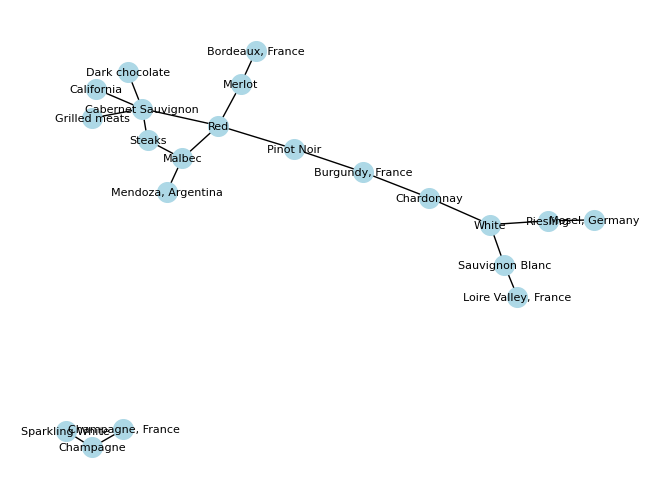

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add wine nodes
wines = ['Cabernet Sauvignon', 'Chardonnay', 'Merlot', 'Pinot Noir', 
         'Sauvignon Blanc', 'Riesling', 'Malbec', 'Champagne']
for wine in wines:
    G.add_node(wine, type='Wine')

# Add property nodes and connect them to wine nodes
# Wine types
wine_types = {
    'Red': ['Cabernet Sauvignon', 'Merlot', 'Pinot Noir', 'Malbec'],
    'White': ['Chardonnay', 'Sauvignon Blanc', 'Riesling'],
    'Sparkling White': ['Champagne']
}
for wine_type, wine_list in wine_types.items():
    G.add_node(wine_type, type='Type')
    for wine in wine_list:
        G.add_edge(wine, wine_type)

# Regions
regions = {
    'California': ['Cabernet Sauvignon'],
    'Burgundy, France': ['Chardonnay', 'Pinot Noir'],
    'Bordeaux, France': ['Merlot'],
    'Loire Valley, France': ['Sauvignon Blanc'],
    'Mosel, Germany': ['Riesling'],
    'Mendoza, Argentina': ['Malbec'],
    'Champagne, France': ['Champagne']
}
for region, wine_list in regions.items():
    G.add_node(region, type='Region')
    for wine in wine_list:
        G.add_edge(wine, region)

# Food pairings
food_pairings = {
    'Grilled meats': ['Cabernet Sauvignon'],
    'Steaks': ['Cabernet Sauvignon', 'Malbec'],
    'Dark chocolate': ['Cabernet Sauvignon'],
    # Other pairings can be added similarly
}
for food, wine_list in food_pairings.items():
    G.add_node(food, type='Food Pairing')
    for wine in wine_list:
        G.add_edge(wine, food)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=8)
plt.show()


In [16]:
import networkx as nx

# Define wines
wines = ['Cabernet Sauvignon', 'Chardonnay', 'Merlot', 'Pinot Noir', 
         'Sauvignon Blanc', 'Riesling', 'Malbec', 'Champagne']

# Define wine types and food pairings
wine_details = [
    ('Cabernet Sauvignon', 'Red', ['Grilled meats', 'Steaks', 'Dark chocolate']),
    ('Chardonnay', 'White', ['Pasta', 'Chicken', 'Seafood']),
    ('Merlot', 'Red', ['Beef', 'Pork', 'Lamb']),
    ('Pinot Noir', 'Red', ['Duck', 'Mushrooms', 'Salmon']),
    ('Sauvignon Blanc', 'White', ['Goat cheese', 'Salads', 'Seafood']),
    ('Riesling', 'White', ['Spicy foods', 'Pork', 'Poultry']),
    ('Malbec', 'Red', ['BBQ', 'Blue cheese', 'Sausage']),
    ('Champagne', 'Sparkling White', ['Oysters', 'Caviar', 'Cheese'])
]

# Create dictionaries to store wine details and types
wine_dict = {i: (wine, wine_type, food_pairing) for i, (wine, wine_type, food_pairing) in enumerate(wine_details)}
type_dict = {i: wine_type for i, (wine, wine_type, _) in enumerate(wine_details)}

# Initialize graph
G = nx.DiGraph()

# Add wine nodes with additional attributes: food pairing
for wine_id, (wine_name, wine_type, food_pairing) in wine_dict.items():
    wine_attributes = {
        'wine_id': wine_id,
        'name': wine_name,
        'type': 'Wine',
        'food_pairing': food_pairing
    }
    node_name = f"Wine_{wine_id}"
    G.add_node(node_name, **wine_attributes)

# Add type nodes and connect each wine to its corresponding type
type_set = {}
for type_id, (_, wine_type, _) in enumerate(wine_details):
    if wine_type not in type_set:
        type_attributes = {
            'type_id': len(type_set),
            'type': wine_type
        }
        type_node_name = f"Type_{len(type_set)}"
        G.add_node(type_node_name, **type_attributes)
        type_set[wine_type] = type_node_name
    
    # Connect each wine to its type node
    wine_node_name = f"Wine_{type_id}"
    type_node_name = type_set[wine_type]
    G.add_edge(wine_node_name, type_node_name)

# The graph G is now set up with wines, types, and food pairings only


In [17]:
# Print the nodes and their attributes
print("Nodes and their attributes:")
for node in G.nodes(data=True):
    print(node)

# Print the edges
print("\nEdges:")
for edge in G.edges():
    print(edge)


Nodes and their attributes:
('Wine_0', {'wine_id': 0, 'name': 'Cabernet Sauvignon', 'type': 'Wine', 'food_pairing': ['Grilled meats', 'Steaks', 'Dark chocolate']})
('Wine_1', {'wine_id': 1, 'name': 'Chardonnay', 'type': 'Wine', 'food_pairing': ['Pasta', 'Chicken', 'Seafood']})
('Wine_2', {'wine_id': 2, 'name': 'Merlot', 'type': 'Wine', 'food_pairing': ['Beef', 'Pork', 'Lamb']})
('Wine_3', {'wine_id': 3, 'name': 'Pinot Noir', 'type': 'Wine', 'food_pairing': ['Duck', 'Mushrooms', 'Salmon']})
('Wine_4', {'wine_id': 4, 'name': 'Sauvignon Blanc', 'type': 'Wine', 'food_pairing': ['Goat cheese', 'Salads', 'Seafood']})
('Wine_5', {'wine_id': 5, 'name': 'Riesling', 'type': 'Wine', 'food_pairing': ['Spicy foods', 'Pork', 'Poultry']})
('Wine_6', {'wine_id': 6, 'name': 'Malbec', 'type': 'Wine', 'food_pairing': ['BBQ', 'Blue cheese', 'Sausage']})
('Wine_7', {'wine_id': 7, 'name': 'Champagne', 'type': 'Wine', 'food_pairing': ['Oysters', 'Caviar', 'Cheese']})
('Type_0', {'type_id': 0, 'type': 'Red'})

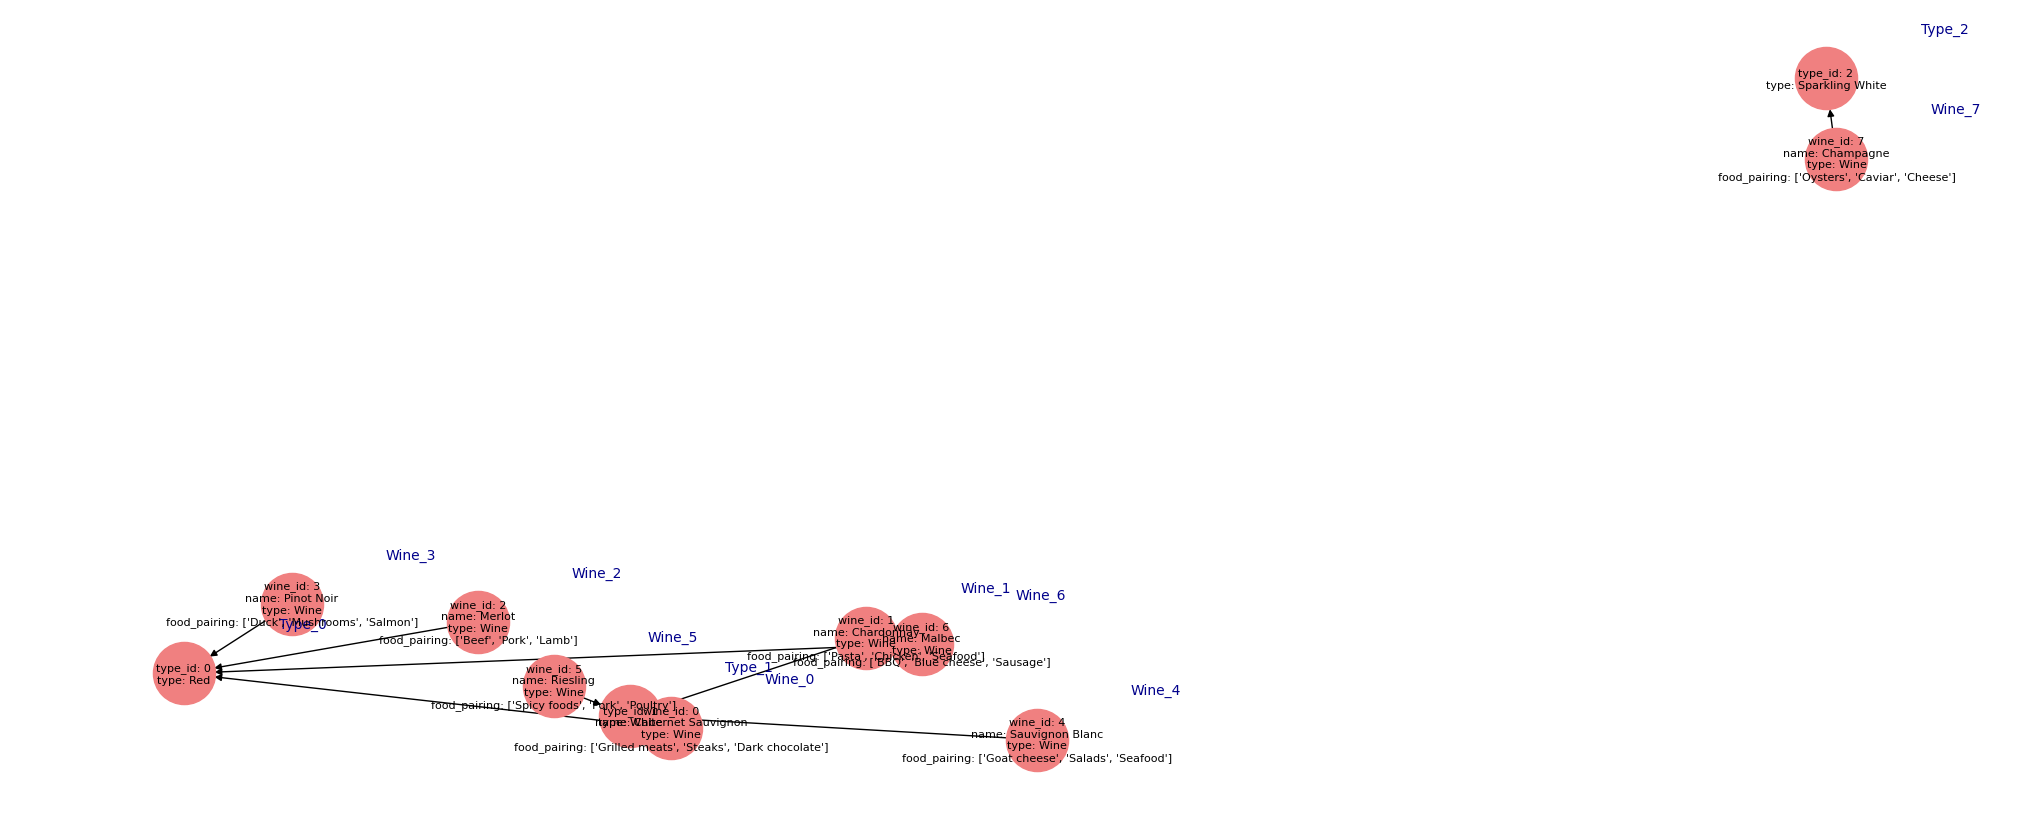

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph with nodes and edges
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(G)  # Position nodes using spring layout

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_size=2000, node_color='lightcoral', 
        font_size=10, font_weight='bold', arrows=True)

# Separate node names (primary labels) and attributes
node_names = {n: n for n in G.nodes}  # Node names as labels
node_attrs = {n: "\n".join([f"{k}: {v}" for k, v in G.nodes[n].items()]) for n in G.nodes}

# Adjust label positions slightly above/below the nodes
offset_pos = {node: (x + 0.05, y + 0.1) for node, (x, y) in pos.items()}  # Shift names upward

# Draw the node names outside the circles
nx.draw_networkx_labels(G, offset_pos, labels=node_names, font_size=10, font_color='darkblue')

# Draw the other attributes inside the nodes
nx.draw_networkx_labels(G, pos, labels=node_attrs, font_size=8)

# Display the graph
plt.show()


In [18]:
import networkx as nx

# Define wines
wines = ['Cabernet Sauvignon', 'Chardonnay', 'Merlot', 'Pinot Noir', 
         'Sauvignon Blanc', 'Riesling', 'Malbec', 'Champagne']

# Define wine types and food pairings
wine_details = [
    ('Cabernet Sauvignon', 'Red', ['Grilled meats', 'Steaks', 'Dark chocolate']),
    ('Chardonnay', 'White', ['Pasta', 'Chicken', 'Seafood']),
    ('Merlot', 'Red', ['Beef', 'Pork', 'Lamb']),
    ('Pinot Noir', 'Red', ['Duck', 'Mushrooms', 'Salmon']),
    ('Sauvignon Blanc', 'White', ['Goat cheese', 'Salads', 'Seafood']),
    ('Riesling', 'White', ['Spicy foods', 'Pork', 'Poultry']),
    ('Malbec', 'Red', ['BBQ', 'Blue cheese', 'Sausage']),
    ('Champagne', 'Sparkling White', ['Oysters', 'Caviar', 'Cheese'])
]

# Create dictionaries to store wine details and types
wine_dict = {i: (wine, wine_type, food_pairing) for i, (wine, wine_type, food_pairing) in enumerate(wine_details)}
type_dict = {i: wine_type for i, (wine, wine_type, _) in enumerate(wine_details)}

In [20]:
# Initialize graph for wines
wine_g = nx.DiGraph()

# Add wine nodes with their attributes
for wine_id, (wine_name, wine_type, food_pairing) in wine_dict.items():
    attributes = {
        'wine_id': wine_id,
        'name': wine_name,
        'type': wine_type,
        'food_pairing': food_pairing
    }
    wine_node_name = f"Wine_{wine_id}"
    wine_g.add_node(wine_node_name, **attributes)

# Add wine type nodes
type_set = {}
for type_id, (_, wine_type, _) in enumerate(wine_details):
    if wine_type not in type_set:
        type_attributes = {
            'type_id': len(type_set),
            'type': wine_type
        }
        type_node_name = f"Type_{len(type_set)}"
        wine_g.add_node(type_node_name, **type_attributes)
        type_set[wine_type] = type_node_name

    # Connect each wine to its type node
    wine_node_name = f"Wine_{type_id}"
    type_node_name = type_set[wine_type]
    wine_g.add_edge(wine_node_name, type_node_name)

# Add food pairings as separate nodes and connect them
food_pairing_set = {}
for wine_id, (_, _, food_pairing) in wine_dict.items():
    for food in food_pairing:
        if food not in food_pairing_set:
            food_pairing_attributes = {
                'food_name': food
            }
            food_pairing_node_name = f"Food_{food_pairing_set.get(food, len(food_pairing_set))}"
            wine_g.add_node(food_pairing_node_name, **food_pairing_attributes)
            food_pairing_set[food] = food_pairing_node_name
        
        # Connect wine to its food pairing node
        wine_node_name = f"Wine_{wine_id}"
        food_pairing_node_name = food_pairing_set[food]
        wine_g.add_edge(wine_node_name, food_pairing_node_name)


In [22]:
# Print the structure of the graph
print("Nodes and their attributes:")
for node in wine_g.nodes(data=True):
    print(node)

Nodes and their attributes:
('Wine_0', {'wine_id': 0, 'name': 'Cabernet Sauvignon', 'type': 'Red', 'food_pairing': ['Grilled meats', 'Steaks', 'Dark chocolate']})
('Wine_1', {'wine_id': 1, 'name': 'Chardonnay', 'type': 'White', 'food_pairing': ['Pasta', 'Chicken', 'Seafood']})
('Wine_2', {'wine_id': 2, 'name': 'Merlot', 'type': 'Red', 'food_pairing': ['Beef', 'Pork', 'Lamb']})
('Wine_3', {'wine_id': 3, 'name': 'Pinot Noir', 'type': 'Red', 'food_pairing': ['Duck', 'Mushrooms', 'Salmon']})
('Wine_4', {'wine_id': 4, 'name': 'Sauvignon Blanc', 'type': 'White', 'food_pairing': ['Goat cheese', 'Salads', 'Seafood']})
('Wine_5', {'wine_id': 5, 'name': 'Riesling', 'type': 'White', 'food_pairing': ['Spicy foods', 'Pork', 'Poultry']})
('Wine_6', {'wine_id': 6, 'name': 'Malbec', 'type': 'Red', 'food_pairing': ['BBQ', 'Blue cheese', 'Sausage']})
('Wine_7', {'wine_id': 7, 'name': 'Champagne', 'type': 'Sparkling White', 'food_pairing': ['Oysters', 'Caviar', 'Cheese']})
('Type_0', {'type_id': 0, 'type

In [23]:
print("\nEdges:")
for edge in wine_g.edges():
    print(edge)


Edges:
('Wine_0', 'Type_0')
('Wine_0', 'Food_0')
('Wine_0', 'Food_1')
('Wine_0', 'Food_2')
('Wine_1', 'Type_1')
('Wine_1', 'Food_3')
('Wine_1', 'Food_4')
('Wine_1', 'Food_5')
('Wine_2', 'Type_0')
('Wine_2', 'Food_6')
('Wine_2', 'Food_7')
('Wine_2', 'Food_8')
('Wine_3', 'Type_0')
('Wine_3', 'Food_9')
('Wine_3', 'Food_10')
('Wine_3', 'Food_11')
('Wine_4', 'Type_1')
('Wine_4', 'Food_12')
('Wine_4', 'Food_13')
('Wine_4', 'Food_5')
('Wine_5', 'Type_1')
('Wine_5', 'Food_14')
('Wine_5', 'Food_7')
('Wine_5', 'Food_15')
('Wine_6', 'Type_0')
('Wine_6', 'Food_16')
('Wine_6', 'Food_17')
('Wine_6', 'Food_18')
('Wine_7', 'Type_2')
('Wine_7', 'Food_19')
('Wine_7', 'Food_20')
('Wine_7', 'Food_21')


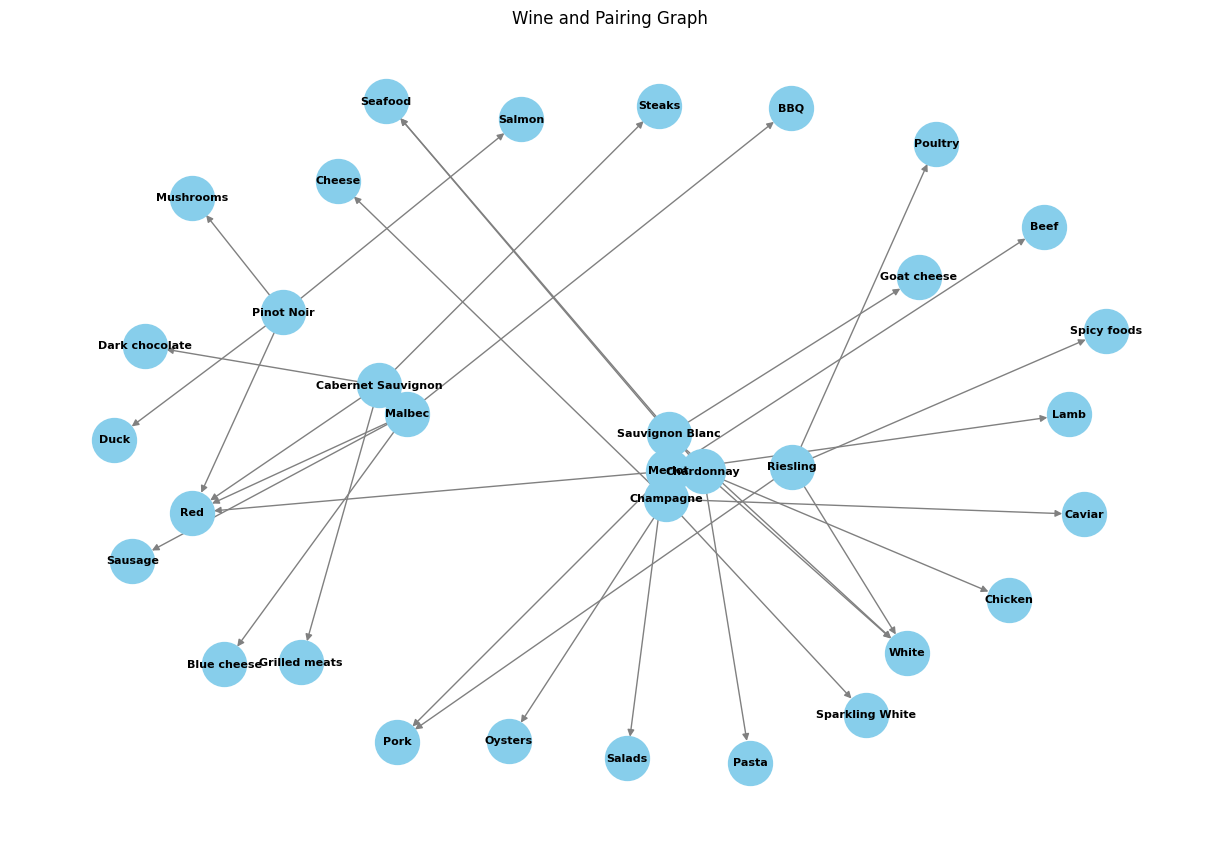

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize graph for wines
wine_g = nx.DiGraph()

# Add wine nodes with their attributes
for wine_id, (wine_name, wine_type, food_pairing) in wine_dict.items():
    attributes = {
        'wine_id': wine_id,
        'name': wine_name,
        'type': wine_type,
        'food_pairing': food_pairing
    }
    wine_node_name = f"Wine_{wine_id}"
    wine_g.add_node(wine_node_name, **attributes)

# Add wine type nodes
type_set = {}
for type_id, (_, wine_type, _) in enumerate(wine_details):
    if wine_type not in type_set:
        type_attributes = {
            'type_id': len(type_set),
            'type': wine_type
        }
        type_node_name = f"Type_{len(type_set)}"
        wine_g.add_node(type_node_name, **type_attributes)
        type_set[wine_type] = type_node_name

    # Connect each wine to its type node
    wine_node_name = f"Wine_{type_id}"
    type_node_name = type_set[wine_type]
    wine_g.add_edge(wine_node_name, type_node_name)

# Add food pairings as separate nodes and connect them
food_pairing_set = {}
for wine_id, (_, _, food_pairing) in wine_dict.items():
    for food in food_pairing:
        if food not in food_pairing_set:
            food_pairing_attributes = {
                'food_name': food
            }
            food_pairing_node_name = f"Food_{food_pairing_set.get(food, len(food_pairing_set))}"
            wine_g.add_node(food_pairing_node_name, **food_pairing_attributes)
            food_pairing_set[food] = food_pairing_node_name
        
        # Connect wine to its food pairing node
        wine_node_name = f"Wine_{wine_id}"
        food_pairing_node_name = food_pairing_set[food]
        wine_g.add_edge(wine_node_name, food_pairing_node_name)

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(wine_g, seed=42)  # Use a spring layout for better visualization

# Draw the nodes and edges, but don't display node labels here
nx.draw(wine_g, pos, with_labels=False, node_size=1000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

# Create a dictionary for node labels (using names instead of IDs)
labels = {}
for node in wine_g.nodes():
    if node.startswith("Wine"):
        labels[node] = wine_g.nodes[node]['name']  # Use the wine name as label
    elif node.startswith("Type"):
        labels[node] = wine_g.nodes[node]['type']  # Use the wine type as label
    elif node.startswith("Food"):
        labels[node] = wine_g.nodes[node]['food_name']  # Use the food pairing as label

# Draw the custom labels with the appropriate names
nx.draw_networkx_labels(wine_g, pos, labels=labels, font_size=8, font_weight='bold', font_color='black')

# Display the plot
plt.title('Wine and Pairing Graph')
plt.axis('off')  # Turn off the axis
plt.show()